📌 Persiapan: Import Librarypip list
!pip list

In [ ]:
!pip list


Package                   Version
------------------------- --------------
altair                    5.5.0
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.9.0
CacheControl              0.14.2
cachetools                5.5.0
certifi                   2025.6.15
cffi                      1.17.0
charset-normalizer        3.3.2
click                     8.1.8
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.2
cryptography              44.0.0
cycler                    0.12.1
dash-core-components      2.0.0
dash-html-components      2.0.0
dash-table                5.0.0
debugpy                   1.8.5
decorator                 5.1.1
defusedxml      


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [388]:
# Data & Visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# SMOTE (Imbalanced Data)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Simpan model
import joblib


In [389]:
# Load dataset
df = pd.read_csv("Ulasan_Penelitian_Fixkali_Cleaned.csv")

# Normalisasi nama kolom
df.columns = df.columns.str.lower().str.strip()

# Drop baris kosong
df.dropna(subset=['ulasan_bersih', 'label'], inplace=True)

# Konversi label ke numerik
if df['label'].dtype == 'object':
    label_map = {'negatif': 0, 'positif': 1}
    df['label'] = df['label'].map(label_map)
else:
    df['label'] = df['label'].astype(int)

# Lihat sekilas data
df.head()


,user_name,rating,ulasan,date,label,sentiment,ulasan_bersih
0,Ayun Hawa,1,"Aneh, voucher goride gocar gamuncul semua pada...",2024-01-31 16:39:09,0,Negative,aneh voucher goride tidak muncul voucher muncu...
1,supri yanto,5,Kok buka aplikasi goride hilang2 mulu...,2024-01-31 13:37:36,0,Negative,buka aplikasi goride hilang melulu
2,Ruwy Masyari,5,Gojek keren bisa pesen sekalian 2 goride satu ...,2024-01-30 14:29:51,1,Positive,gojek keren bisa pesan goride terima kasih gojek
3,Achmad Sayid,3,Sekarang udah mahal goride dan gofood,2024-01-30 09:18:49,0,Negative,mahal goride
4,Resa Agustin,1,Kesalahan dari sistem gojek saldo Gopay kepoto...,2024-01-29 23:35:04,0,Negative,salah sistem gojek saldo gopay potong otomatis...


In [390]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# TF-IDF Feature Extraction
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=1000,
    min_df=2,
    max_df=0.95,
    sublinear_tf=True
)

# Proses ekstraksi fitur dari kolom 'ulasan_bersih'
X_tfidf = tfidf.fit_transform(df['ulasan_bersih'])

# Konversi hasil TF-IDF menjadi DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan 5 baris pertama dari hasil TF-IDF
tfidf_df.head()

,aduh,ajar,akal,aktif,akun,akun gojek,akurat,alam,alamat,alamat tuju,...,voucher goride,voucher nya,voucher tidak,voucher voucher,wajib,was,wilayah,woi,yaa,you
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.30212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.216431,0.0,0.0,0.0,0.161201,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [391]:
X = df['ulasan_bersih']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 593
Jumlah data uji: 66


In [392]:
# Pipeline machine learning
pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=1000, sublinear_tf=True)),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
])

In [393]:
# Hyperparameter tuning
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(
    pipeline, param_grid=param_grid,
    scoring='f1', cv=5, verbose=1, n_jobs=-1
)

# Latih model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=1000,
                                                        ngram_range=(1, 2),
                                                        sublinear_tf=True)),
                                       ('smote', SMOTE(random_state=42)),
                                       ('svm',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='f1', verbose=1)

Akurasi: 0.8939393939393939
Best Parameters: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        48
           1       0.87      0.72      0.79        18

    accuracy                           0.89        66
   macro avg       0.88      0.84      0.86        66
weighted avg       0.89      0.89      0.89        66



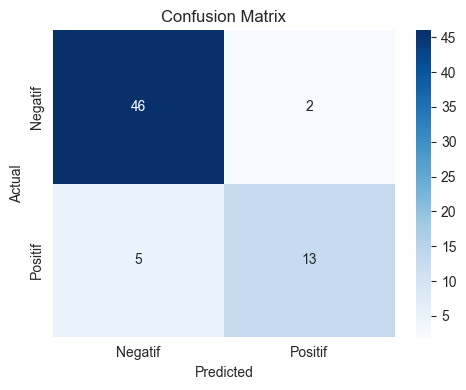

In [394]:
y_pred = grid_search.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


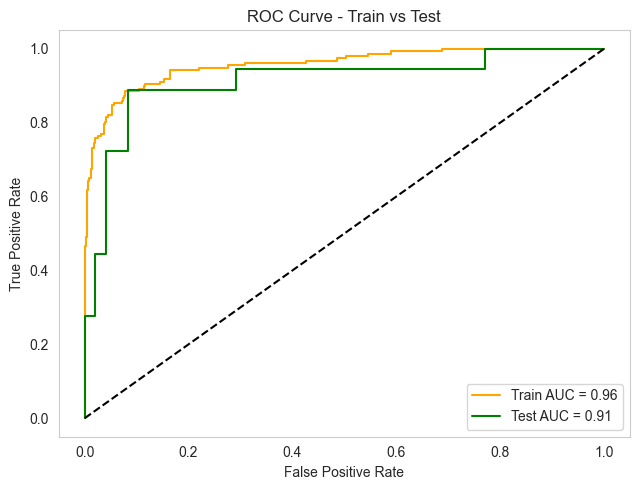

In [395]:
train_probs = grid_search.predict_proba(X_train)[:, 1]
test_probs = grid_search.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(6.5, 5))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}', color='orange')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Train vs Test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [396]:
pipeline_terbaik = grid_search.best_estimator_
cv_scores = cross_val_score(pipeline_terbaik, X, y, cv=5, scoring='f1_macro')

print("Cross-Validation F1 Macro Scores:", cv_scores)
print("Mean F1 Score:", round(cv_scores.mean(), 4))
print("Standard Deviation:", round(cv_scores.std(), 4))


Cross-Validation F1 Macro Scores: [0.79770853 0.87246377 0.83136378 0.75694677 0.72927669]
Mean F1 Score: 0.7976
Standard Deviation: 0.0511


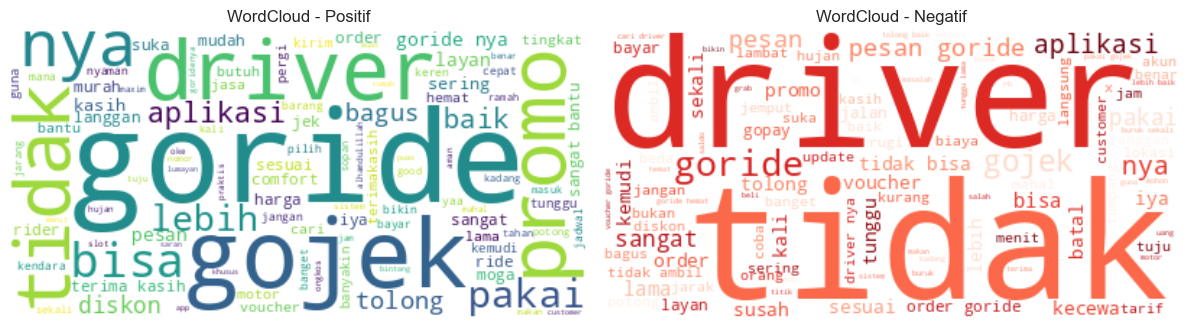

In [397]:
ulasan_positif = df[df['label'] == 1]['ulasan_bersih']
ulasan_negatif = df[df['label'] == 0]['ulasan_bersih']

text_positif = " ".join(ulasan_positif)
text_negatif = " ".join(ulasan_negatif)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(background_color='white', max_words=100).generate(text_positif)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Positif')

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(background_color='white', colormap='Reds', max_words=100).generate(text_negatif)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Negatif')

plt.tight_layout()
plt.show()


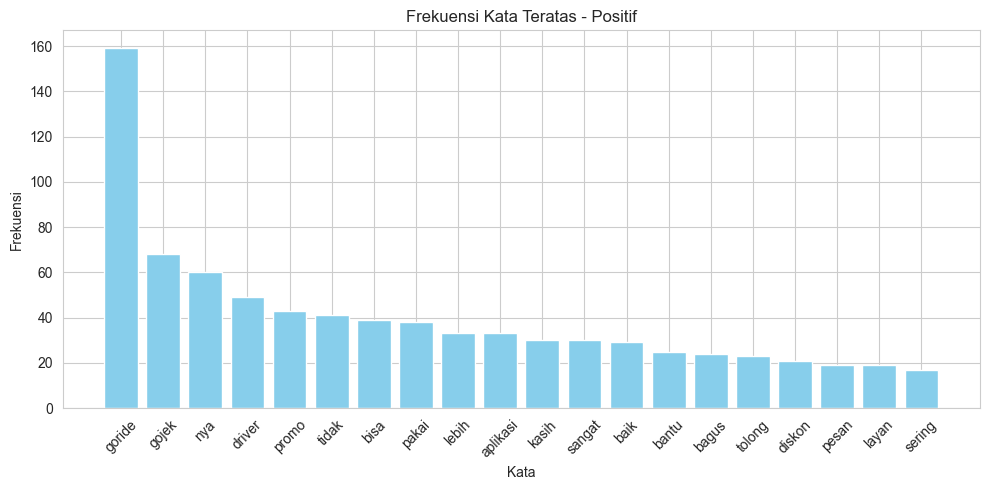

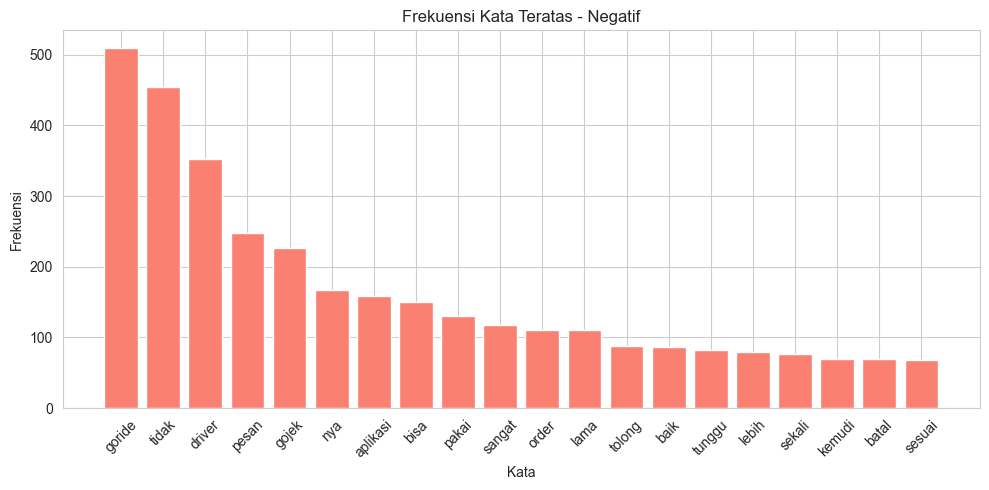

In [398]:
def plot_top_words(text_series, label_name, top_n=20):
    words = " ".join(text_series).split()
    word_freq = Counter(words)
    common_words = word_freq.most_common(top_n)

    words, freqs = zip(*common_words)

    plt.figure(figsize=(10, 5))
    plt.bar(words, freqs, color='skyblue' if label_name == 'positif' else 'salmon')
    plt.xticks(rotation=45)
    plt.title(f'Frekuensi Kata Teratas - {label_name.capitalize()}')
    plt.xlabel('Kata')
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

plot_top_words(ulasan_positif, 'positif')
plot_top_words(ulasan_negatif, 'negatif')


In [399]:
def prediksi_manual(teks_list):
    for teks in teks_list:
        pred = grid_search.predict([teks])[0]
        proba = grid_search.predict_proba([teks])[0][1]
        label = "Positif" if pred == 1 else "Negatif"
        print(f"\n📝 Review: {teks}")
        print(f"🔮 Prediksi: {label}")
        print(f"📊 Confidence: {proba:.2%}")

# # Contoh penggunaan
# prediksi_manual([
#     "bagus bangettt pliss ih aku slalu dapet diskon goride jadi seribu🤩🤩🤩",
#     "tiap pesen go ride selalu lama dapetnya, mau ujan ato engga, selalu lama, nunggu sampe setengah jam lebih juga ngga dapet dapet, ngga rekomen buat yang lagi dikejar waktu, perbaiki tuh yang suka matiin aplikasi",
#     "makasih sudah menghadirkan goride hemat, kalau bisa banyakin promo yaww",
#     "Fitur chat tolong dikembalikan lagi. Ga bisa tempel fitur dari galeri. Biasanya saya pandu driver pake SS peta ke lokasi dituju supaya driver ga muter2 n salah Jalan. Maps nya masih ngawur arahnya Tolong ga ush update kalo maslaah yg sebelumnya belum terkondisikan n justru menurun.",
#     "untuk jenis goride di Purwakarta sudah oke dan sangat mudah untuk mencari driver"
# ])

# Contoh penggunaan
prediksi_manual([
    "selama saya menggunakan layanan goride pengemudinya bau, helm nya ngk ada",
    "goride baik",
    " untuk jenis goride di Purwakarta sudah oke dan sangat gampang untuk mencari driver"
])



📝 Review: selama saya menggunakan layanan goride pengemudinya bau, helm nya ngk ada
🔮 Prediksi: Negatif
📊 Confidence: 43.69%

📝 Review: goride baik
🔮 Prediksi: Positif
📊 Confidence: 55.13%

📝 Review:  untuk jenis goride di Purwakarta sudah oke dan sangat gampang untuk mencari driver
🔮 Prediksi: Negatif
📊 Confidence: 21.26%


In [400]:
# joblib.dump(grid_search, 'models/svm_model_predict.pkl')
# joblib.dump(grid_search.best_estimator_.named_steps['tfidf'], 'models/tfidf_vectorizer_predict.pkl')
# print("✅ Model dan vectorizer berhasil disimpan.")
